# 第 5 章 pandas 入门

虽然pandas采用了大量的NumPy编码风格，但二者最大的不同是pandas是专门为
处理表格和混杂数据设计的。而NumPy更适合处理统一的数值数组数据。Series和DataFrame是非常好用的封装

In [2]:
import pandas as pd
from pandas import Series, DataFrame

### 5.1 pandas的数据结构介绍
* Series
Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型） 以及
一组与之相关的数据标签（即索引） 组成。

In [5]:
ser=pd.Series([1,-5,7,3])
ser

0    1
1   -5
2    7
3    3
dtype: int64

In [6]:
#索引在左边，值在右边.
ser.values

array([ 1, -5,  7,  3])

In [7]:
ser.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
#可以在创建的时候指定索引
ser2=pd.Series([6,2,-5,7],index=['a','b','c','d'])
ser2

a    6
b    2
c   -5
d    7
dtype: int64

In [10]:
#可以通过索引来取数
ser2['c']

-5

In [13]:
#用法上跟numpy的array一样用
ser2[ser2>0]

a    6
b    2
d    7
dtype: int64

In [14]:
ser2*5

a    30
b    10
c   -25
d    35
dtype: int64

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series.
可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映
射。它可以用在许多原本需要字典参数的函数中

In [15]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

使用缺失（missing） 或NA表示缺失数据

In [17]:
pd.notnull(obj3)

Ohio      True
Texas     True
Oregon    True
Utah      True
dtype: bool

In [18]:
obj3.isnull()

Ohio      False
Texas     False
Oregon    False
Utah      False
dtype: bool

对于许多应用而言，Series最重要的一个功能是，它会根据运算的索引标签自动对
齐数据.类似数据库的jion

In [20]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series对象本身及其索引都有一个name属性，该属性跟pandas其他的关键功能关
系非常密切：

In [22]:
obj4.name='kaka'
obj4.index.name='index_kaka'
obj4

index_kaka
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: kaka, dtype: float64

Series的索引可以通过赋值的方式就地修改

In [23]:
obj4.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj4

Bob          NaN
Steve    35000.0
Jeff     16000.0
Ryan     71000.0
Name: kaka, dtype: float64

* DataFrame


DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值
类型（数值、字符串、布尔值等） 。DataFrame既有行索引也有列索引，它可以被
看做由Series组成的字典（共用同一个索引） 。DataFrame中的数据是以一个或多
个二维块存放的（而不是列表、字典或别的一维数据结构） 
scala也有df都是相同的

In [27]:
#建DataFrame通常是由外部数据导入
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [29]:
#对于大表选取前5行
df.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [31]:
#指定了列，会按照指定的顺序进行排列
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [50]:
#没有的会用nan填充
df2=pd.DataFrame(data,columns=['year','state','pop','debt'],index=['one','two','three','for','five','six'])
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
for,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [52]:
df2['pop']
#获取的是一个Series


one      1.5
two      1.7
three    3.6
for      2.4
five     2.9
six      3.2
Name: pop, dtype: float64

In [53]:
#也可以通过列名直接调用
df2.year


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
for,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [54]:
#行使用loc来索引
df2.loc['six']


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
for,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列。关键字del用于删除列

In [55]:
del df2['debt']
df2

,year,state,pop
one,2000,Ohio,1.5
two,2001,Ohio,1.7
three,2002,Ohio,3.6
for,2001,Nevada,2.4
five,2002,Nevada,2.9
six,2003,Nevada,3.2


In [56]:
#嵌套字典也可以作为df
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [59]:
pd3=pd.DataFrame(pop)
pd3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [61]:
#pandas支持Numpy的数组方法
pd3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


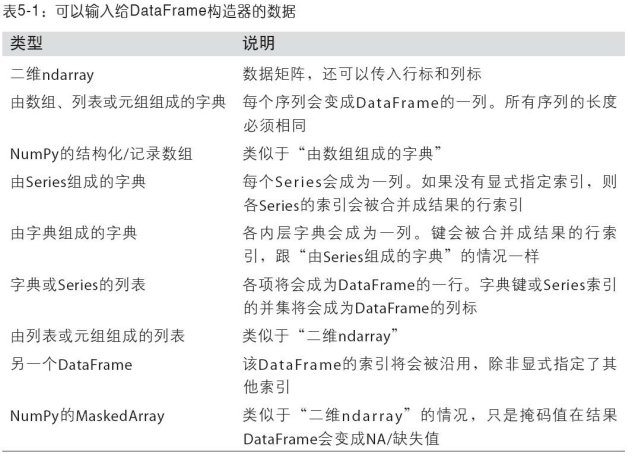

* 索引对象


pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等） 

In [62]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [63]:
#index对象是不可变的，并且可以包含重复的标签

In [64]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

### 5.2 基本功能

* 重新索引

In [66]:
obj=pd.Series([5,2,3,6],index=['a','b','c','d'])
obj

a    5
b    2
c    3
d    6
dtype: int64

In [68]:
obj2=obj.reindex(['d','c','b','a','z'])
obj2

d    6.0
c    3.0
b    2.0
a    5.0
z    NaN
dtype: float64

In [71]:
obj3 = pd.Series([4, -5, 18,33], index=[0
, 9, 11,24])
obj3

0      4
9     -5
11    18
24    33
dtype: int64

In [74]:
#可以在重新索引的时候进行插值
obj3.reindex(range(24),method='ffill')

0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9     -5
10    -5
11    18
12    18
13    18
14    18
15    18
16    18
17    18
18    18
19    18
20    18
21    18
22    18
23    18
dtype: int64

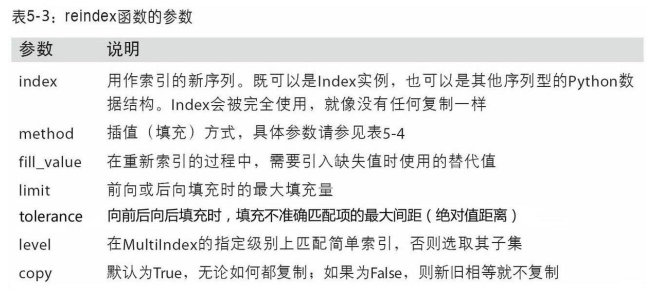

删除轴上的值


In [77]:
import numpy as np
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [79]:
obj2=obj.drop('c')
obj2

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

通过传递axis=1或axis='columns'可以删除列的值，
* 注意与np的mean，max的是相反的，那个传0是列

In [82]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah',
'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [83]:
data.drop('one',1)

,two,three,four
Ohio,1,2,3
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


* 索引、选取和过滤

类似np的数组索引

In [85]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [86]:
#除了常用的切片索引
obj[['d','a','c']]

d    3.0
a    0.0
c    2.0
dtype: float64

In [88]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

In [90]:
obj[1:3]

b    1.0
c    2.0
dtype: float64

In [91]:
#利用标签的切片运算与普通的Python切片运算不同，其末端是包含的
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [93]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah',
'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [95]:
data[['one','four']]

,one,four
Ohio,0,3
Colorado,4,7
Utah,8,11
New York,12,15


In [96]:
data[:-2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [98]:
data[data < 5] = -5
data

,one,two,three,four
Ohio,-5,-5,-5,-5
Colorado,-5,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


* 轴标签（loc） 或整数索引（iloc） ，从DataFrame
选择行和列的子集

In [99]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [100]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [101]:
data.iloc[:, :3]

,one,two,three
Ohio,-5,-5,-5
Colorado,-5,5,6
Utah,8,9,10
New York,12,13,14


In [103]:
data.iloc[:, :3][data.three>=10]

,one,two,three
Utah,8,9,10
New York,12,13,14


索引
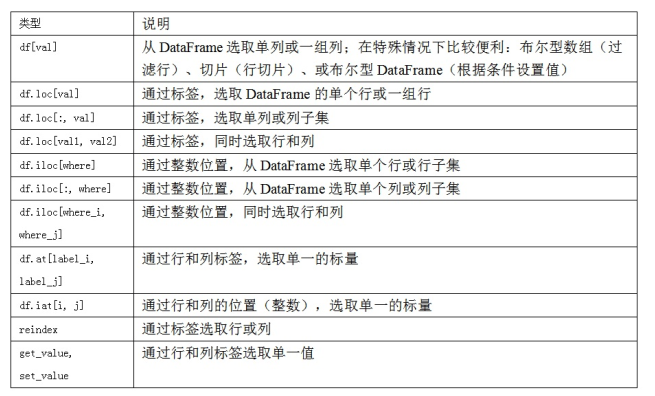

* 整数索引


In [104]:
ser = pd.Series(np.arange(3.))

In [105]:
#与python内置索引的区别
ser[-1]

KeyError: -1

In [109]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]
#非整数索引是可以的，为了避免错误统一使用loc或者iloc标签更加准确

2.0

* 算术运算和数据对齐

In [111]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c','d', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [114]:
s1+s2
#会自动对齐，df也会同样的操作

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [115]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [116]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [118]:
#找不到时填充0
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


r开头的是翻转参数的
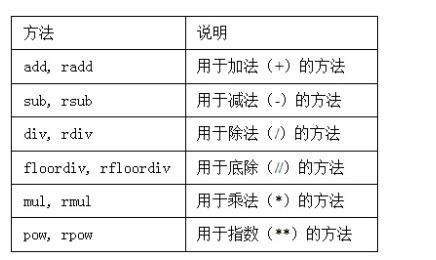

In [119]:
#当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播
arr = np.arange(12.).reshape((3, 4))
arr
arr[0]
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [121]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


如果你希望匹配行且在列上广播，则必须使用算术运算方法

In [122]:
series3 = frame['d']
frame
series3
frame.sub(series3, axis='index')
#axis=0也可以

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


* 函数应用和映射

In [123]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame
np.abs(frame)

,b,d,e
Utah,0.290447,0.702557,0.181212
Ohio,0.629704,0.265035,2.234247
Texas,0.573374,0.104517,0.766953
Oregon,0.160851,0.115782,0.203575


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame
的apply方法即可实现此功能

In [124]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    0.468853
d    0.967592
e    2.415459
dtype: float64

In [129]:
#按照行执行
frame.apply(f,axis=1)

Utah      0.993004
Ohio      2.863952
Texas     1.340326
Oregon    0.364426
dtype: float64

In [131]:
# 还可以用来格式化
format = lambda x: '%.3f' % x
frame.applymap(format)

,b,d,e
Utah,-0.290,0.703,-0.181
Ohio,-0.630,-0.265,2.234
Texas,-0.573,0.105,0.767
Oregon,-0.161,-0.116,0.204


In [133]:
#只能够用在Series上
frame['e'].map(format)

Utah      -0.181
Ohio       2.234
Texas      0.767
Oregon     0.204
Name: e, dtype: object

* 排序和排名